<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_LSTM_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Install TensorFlow
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [42]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
### Build the dataset
# This is a nonlinear AND long-distance dataset
# Long-distance -> requires long-term memory

# Start with a small T and increase it later
T = 30
D = 1
X = []
Y = []

def get_label (x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
#  y = get_label(x, -1, -2, -3)      # short-distance -> -1, -2, -3 are the last 3 indices in the dataset
  y = get_label(x, 0, 1, 2)         # long-distance -> 0, 1, 2 are the first 3 indices in the dataset
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [44]:
# Not included:
# Linear classification: ~50% accuracy - FAIL

In [45]:
# Now try a Simple RNN
inputs = np.expand_dims(X, -1)

# Make RNN
i = Input(shape=(T, D))

# Method 1:
# x = SimpleRNN(5)(i)
# x = LSTM(5)(i)
# x = GRU(5)(i)

# Method 2:
x = LSTM(5, return_sequences=True)(i)     # returns all hidden states, (T x M) array
x = GlobalMaxPooling1D()(x)               # Collapses first dimension of (T x M) and returns a vector of size M

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    # optimizer='adam',
    optimizer=Adam(0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy'],
)

In [46]:
# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 14ms/step - loss: 0.6915 - accuracy: 0.5260 - val_loss: 0.6959 - val_accuracy: 0.5084
Epoch 2/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6926 - accuracy: 0.5212 - val_loss: 0.6938 - val_accuracy: 0.5112
Epoch 3/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6914 - accuracy: 0.5228 - val_loss: 0.6957 - val_accuracy: 0.5108
Epoch 4/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6900 - accuracy: 0.5328 - val_loss: 0.6929 - val_accuracy: 0.5112
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6911 - accuracy: 0.5236 - val_loss: 0.6919 - val_accuracy: 0.5168
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6899 - accuracy: 0.5476 - val_loss: 0.6924 - val_accuracy: 0.5216
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6892 - accuracy: 0.5392 - val_loss: 0.6919 - val_accuracy: 0.5200
Epoch 8/2

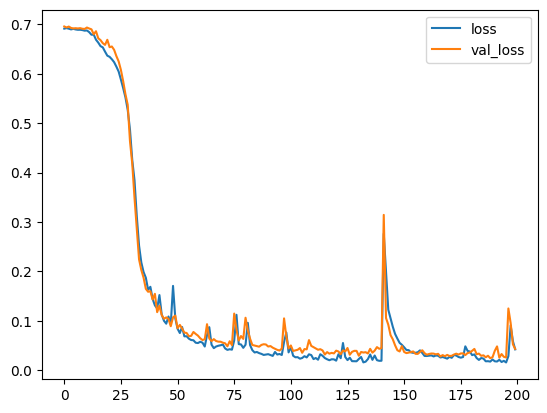

In [47]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

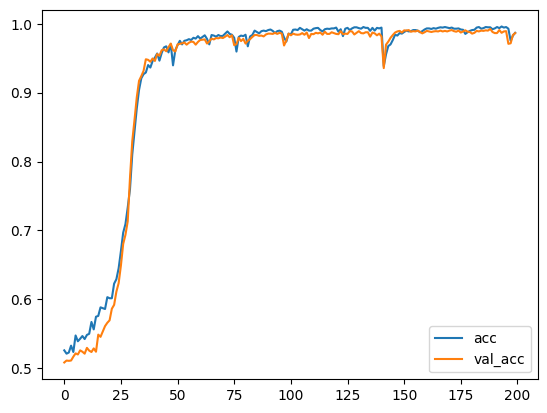

In [48]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [52]:
# Summary (order of first to fail):
# Simple RNN
# GRU
# LSTM
# LSTM + Global Max Pooling - using global max pooling over all of the hidden states